In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/Surveyvspreference.csv',encoding='latin1')
data.head()

,preference,Text
0,2,Talk to my family member usually my brothers a...
1,2,Most of the time while I am stressed did rough...
2,3,I usually talk to my friends and wife. Sometim...
3,3,"In professional life, I have a mentor named Ta..."
4,2,Through prayer and a deep sleep. I prefer pray...


In [ ]:
data.shape

(257, 2)

In [ ]:
#indenpendent variable
X=list(data['Text'])

In [ ]:
#denpendent variable
y=list(data['preference'])

In [ ]:
data['preference'].value_counts()

2    112
3     57
1     55
4     33
Name: preference, dtype: int64

In [ ]:
len(data)

257

In [ ]:
from sklearn.model_selection import train_test_split
X=data['Text'].values.tolist()
y=data['preference'].values.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
type(data['Text'])

pandas.core.series.Series

In [ ]:
#seqlen=data['Text'].apply(lambda x: len(x.split()))
seqlen = data['Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-20-3d90a38e1a3c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(seqlen)


<Axes: xlabel='Text', ylabel='Density'>

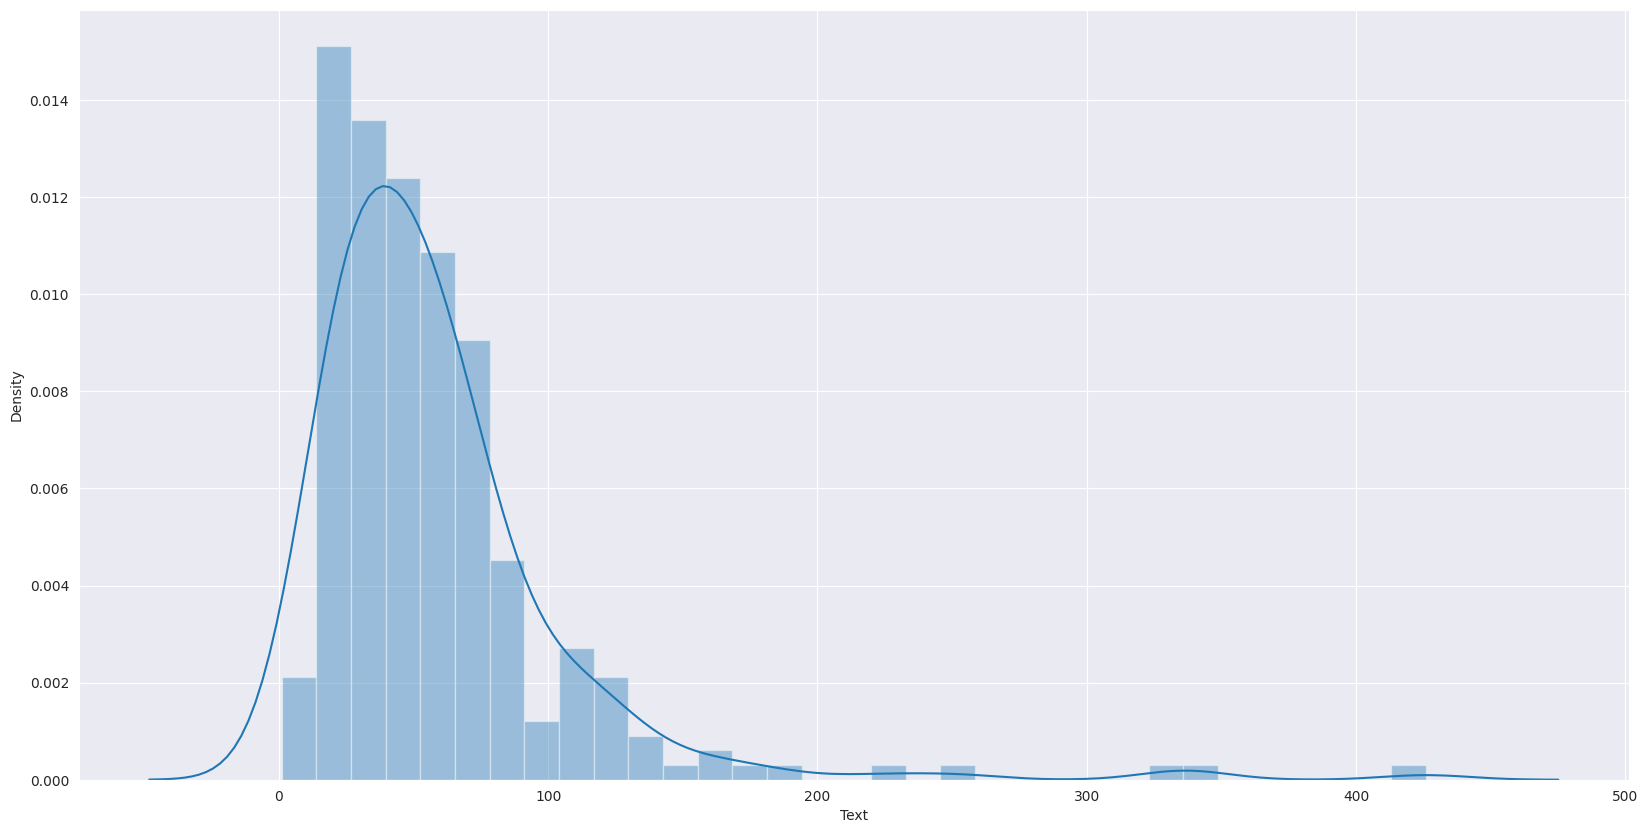

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.distplot(seqlen)

In [ ]:
SEQ_LEN = 130

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.2 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')


In [ ]:
tokens=tokenizer.encode_plus("hello world", max_length=SEQ_LEN, truncation=True, padding="max_length",
                             add_special_tokens=True, return_token_type_ids=False, return_attention_mask=True,
                             return_tensors='tf')

In [ ]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 130), dtype=int32, numpy=
array([[  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 

In [ ]:
import numpy as np


In [ ]:
Xids=np.zeros((len(data), SEQ_LEN))
Xmask=np.zeros((len(data), SEQ_LEN))


In [ ]:
Xids.shape

(257, 130)

In [ ]:
for i,  sequence in enumerate(data['Text']):
  tokens=tokenizer.encode_plus(sequence, max_length=SEQ_LEN, truncation=True, padding="max_length",
                             add_special_tokens=True, return_token_type_ids=False, return_attention_mask=True, return_tensors='tf')
  Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [ ]:
Xids

array([[ 101., 8768., 1106., ...,    0.,    0.,    0.],
       [ 101., 2082., 1104., ...,    0.,    0.,    0.],
       [ 101.,  146., 1932., ...,    0.,    0.,    0.],
       ...,
       [ 101., 5055., 1996., ...,    0.,    0.,    0.],
       [ 101., 1753., 3888., ...,    0.,    0.,    0.],
       [ 101., 5055.,  170., ...,    0.,    0.,    0.]])

In [ ]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [ ]:
data['preference'].unique

<bound method Series.unique of 0      2
1      2
2      3
3      3
4      2
      ..
252    3
253    3
254    3
255    2
256    2
Name: preference, Length: 257, dtype: int64>

In [ ]:
arr = data['preference'].values
arr.size

257

In [ ]:
labels=np.zeros((arr.size, arr.max()+1))
labels.shape


(257, 5)

In [ ]:
labels[np.arange(arr.size), arr] = 1
labels

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [ ]:
for i in dataset.take(1):
  print(i)

(<tf.Tensor: shape=(130,), dtype=float64, numpy=
array([  101.,  8768.,  1106.,  1139.,  1266.,  1420.,  1932.,  1139.,
        3330.,  1105.,  1534.,   119.,  5875.,  2934.,  1114.,  1139.,
        1601.,  2053.,   119.,  3969.,  4419.,  1494.,  1121., 18203.,
        1118., 16252., 19346., 10961.,   119.,  1130.,  1343.,  1965.,
         146.,  2222.,  1106.,  4851.,  6600.,  1105., 10507.,   119.,
         102.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0

In [ ]:
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

In [ ]:
dataset = dataset.map(map_func)

In [ ]:
for i in dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(130,), dtype=float64, numpy=
array([  101.,  8768.,  1106.,  1139.,  1266.,  1420.,  1932.,  1139.,
        3330.,  1105.,  1534.,   119.,  5875.,  2934.,  1114.,  1139.,
        1601.,  2053.,   119.,  3969.,  4419.,  1494.,  1121., 18203.,
        1118., 16252., 19346., 10961.,   119.,  1130.,  1343.,  1965.,
         146.,  2222.,  1106.,  4851.,  6600.,  1105., 10507.,   119.,
         102.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,

In [ ]:
dataset = dataset.shuffle(100000).batch(32) #line shuffle

In [ ]:
DS_LEN = len(list(dataset))

In [ ]:
DS_LEN

9

In [ ]:
SPLIT = 0.9


train = dataset.take(round(DS_LEN*SPLIT))  # get first 90% of batches
val = dataset.skip(round(DS_LEN*SPLIT))  # skip first 90% and keep final 10%

In [ ]:
#from transformers import AutoModel
from transformers import AutoTokenizer,TFAutoModel

In [ ]:
bert = TFAutoModel.from_pretrained('bert-base-cased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')




In [ ]:
embeddings = bert(input_ids, attention_mask=mask)[0] #input in bert

Z = tf.keras.layers.GlobalMaxPool1D()(embeddings) # important feature selection, 1D=Sequence
Z = tf.keras.layers.BatchNormalization()(Z) # tense to zero
Z = tf.keras.layers.Dense(128, activation='relu')(Z) # NN layer, relu=avoid vanising gradeient decent
Z = tf.keras.layers.Dropout(0.1)(Z) # avoid overfit
Z = tf.keras.layers.Dense(32, activation='relu')(Z)
k = tf.keras.layers.Dense(5, activation='softmax', name='outputs')(Z) #multiclass-Softmax//binary class-sigmoid

model = tf.keras.Model(inputs=[input_ids, mask], outputs=k)

model.layers[2].trainable = False


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 130)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 130)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 130, 7                                       

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
pre=tf.keras.metrics.Precision()
rec=tf.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)


model.compile(optimizer=optimizer, loss=loss, metrics=[acc, pre, rec])

history = model.fit(train, validation_data=val, epochs=50)

Epoch 1/50
8/8 [==============================] - 30s 709ms/step - loss: 2.0732 - accuracy: 0.2305 - precision: 0.2519 - recall: 0.1289 - val_loss: 0.7851 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 2s 289ms/step - loss: 1.3629 - accuracy: 0.4531 - precision: 0.5410 - recall: 0.2578 - val_loss: 0.6424 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/50
8/8 [==============================] - 2s 296ms/step - loss: 1.0834 - accuracy: 0.5469 - precision: 0.6216 - recall: 0.3594 - val_loss: 0.9655 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 3s 314ms/step - loss: 0.9704 - accuracy: 0.5820 - precision: 0.7083 - recall: 0.4648 - val_loss: 1.2031 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 2s 292ms/step - loss: 0.9866 - ac

In [ ]:
pre=tf.keras.metrics.Precision()

pre